# libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

In [90]:
# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv("C:\\Users\\gurwi\\ML all TASK\\task 2 ml\\EastWestAirlines_DataSet.csv")

df

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# Data Exploration

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [97]:
# Check for missing values
print(df.isnull().sum())

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64


In [98]:
print(df.describe())

                ID       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      

In [99]:
df

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## Plotting histograms for numerical columns

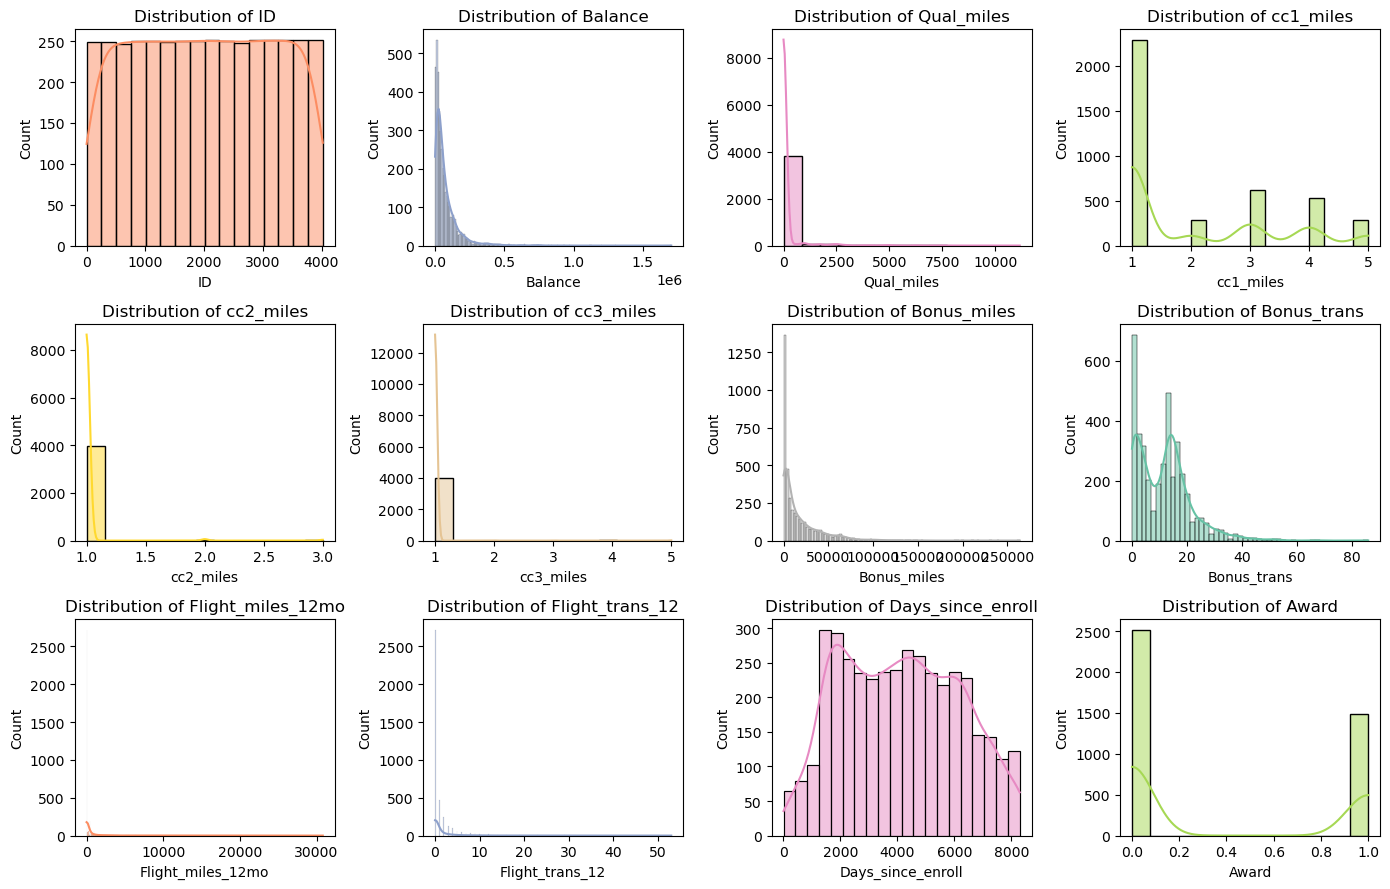

In [101]:
# Set the color palette for all plots
sns.set_palette("Set2")


numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Dynamically calculate the number of rows and columns for subplots
n_cols = 4  # Number of columns in the grid
n_rows = (len(numerical_cols) // n_cols) + (len(numerical_cols) % n_cols > 0)  # Calculate rows needed

# Create a figure for plotting
plt.figure(figsize=(14, 3 * n_rows))

# Plot each numerical column in a separate subplot
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # Dynamic grid size based on number of columns
    sns.histplot(df[col], kde=True, color=sns.color_palette("Set2")[i % 8])
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

# Show the plots
plt.show()

## Pairplot to visualize the relationships between numerical features

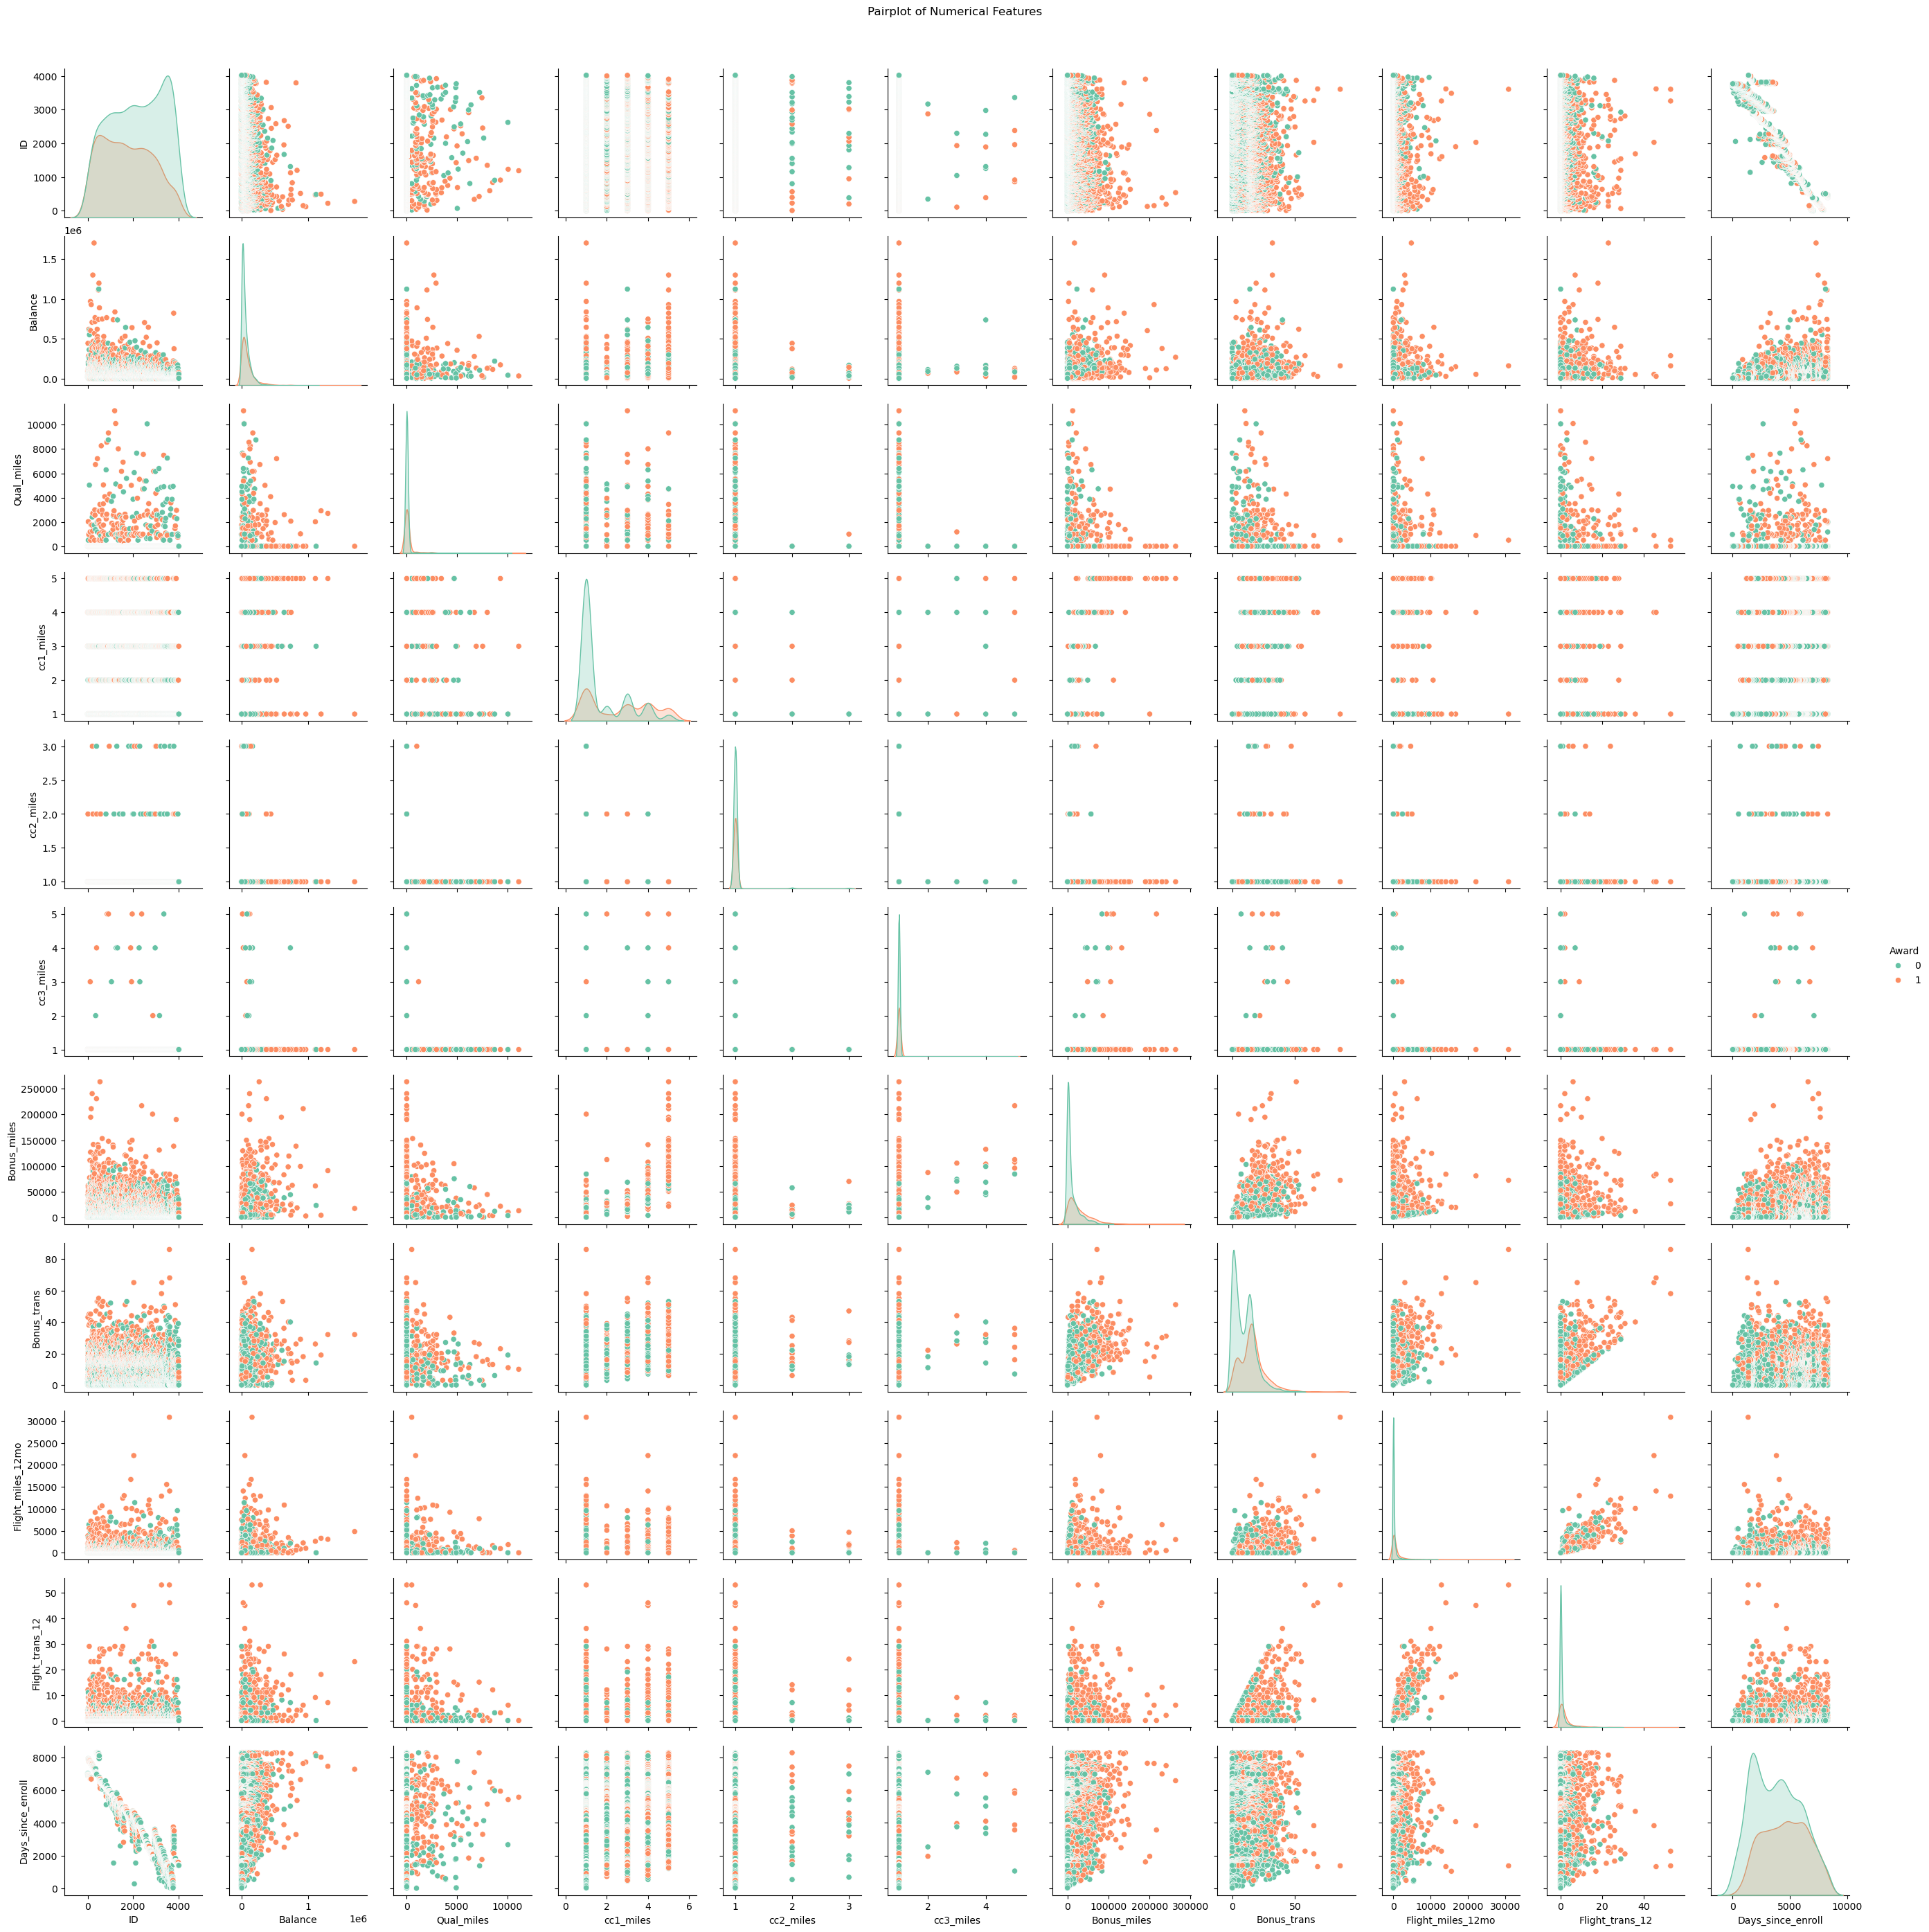

In [103]:

sns.pairplot(df[numerical_cols], hue='Award', palette='Set2')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


## Correlation heatmap

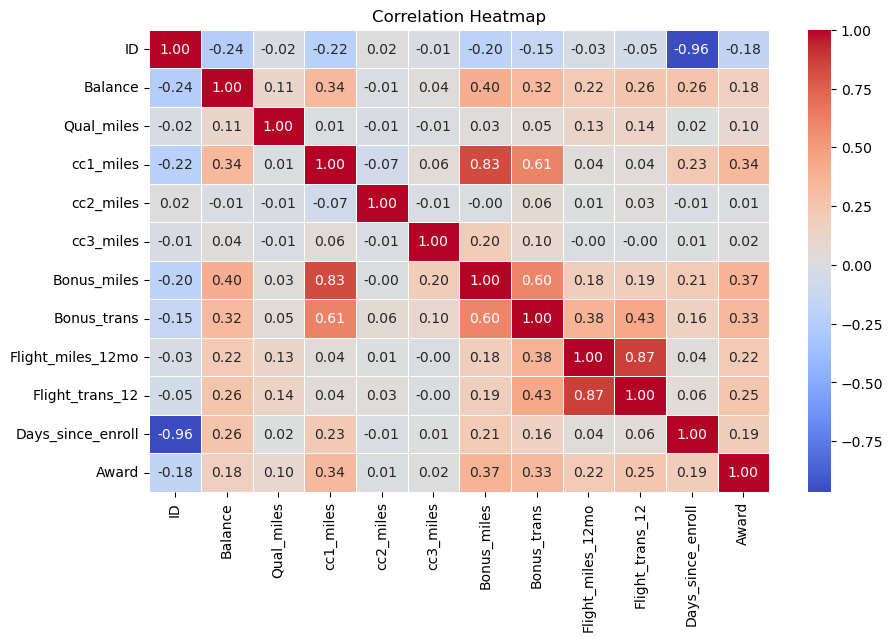

In [105]:

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Plot each numerical column

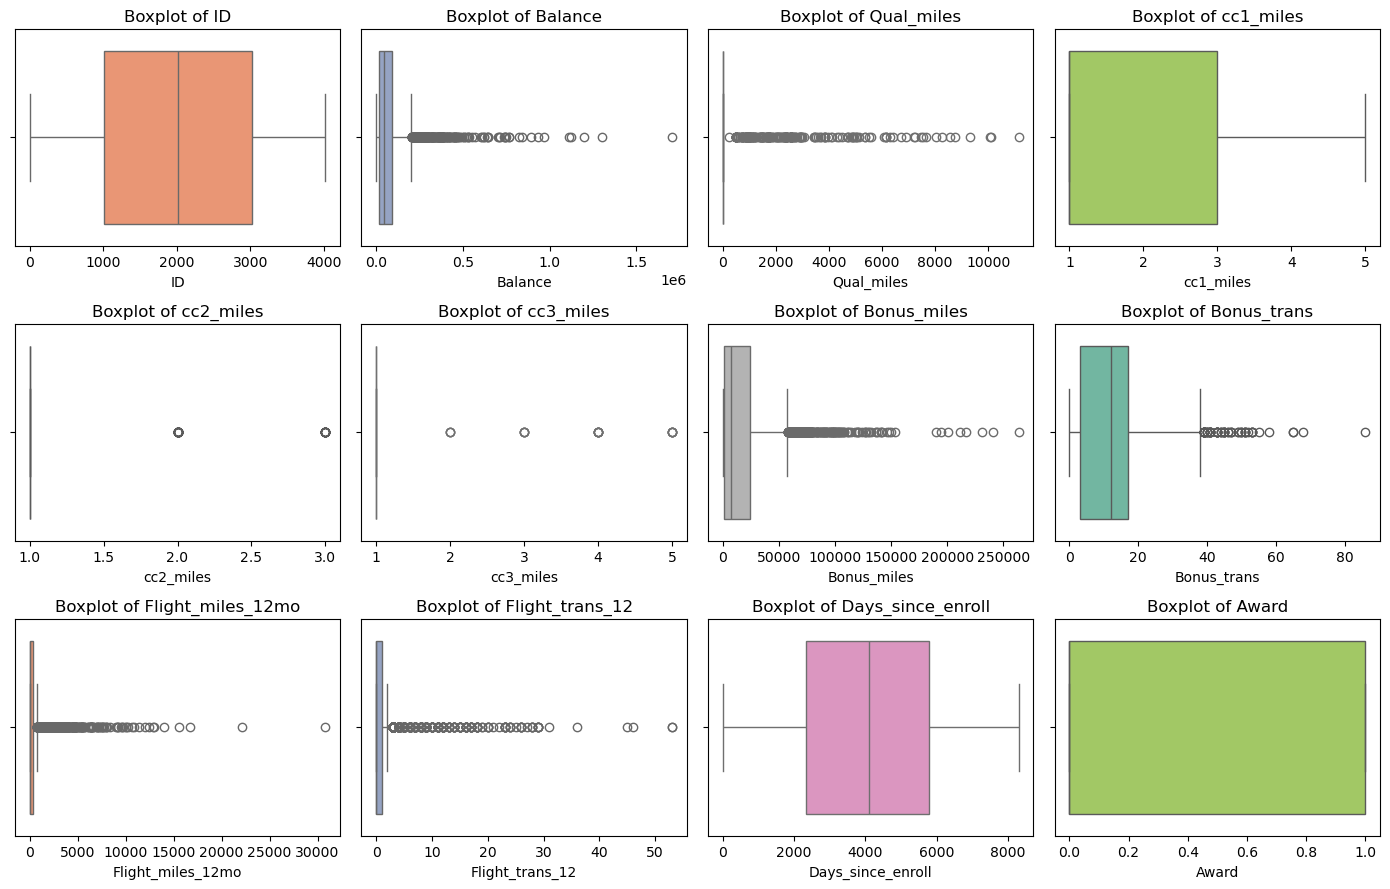

In [107]:
# Get the numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Dynamically calculate the number of rows and columns for subplots
n_cols = 4  # Number of columns in the grid
n_rows = (len(numerical_cols) // n_cols) + (len(numerical_cols) % n_cols > 0)  # Calculate rows needed

# Create a figure for plotting
plt.figure(figsize=(14, 3 * n_rows))

# Plot each numerical column in a separate subplot
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # Dynamic grid size based on number of columns
    sns.boxplot(data=df, x=col, color=sns.color_palette("Set2")[i % 8])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

# Show the plots
plt.show()

## Countplot for Award column

C:\Users\gurwi\AppData\Local\Temp\ipykernel_11216\3277328299.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Award', data=df, palette='deep')


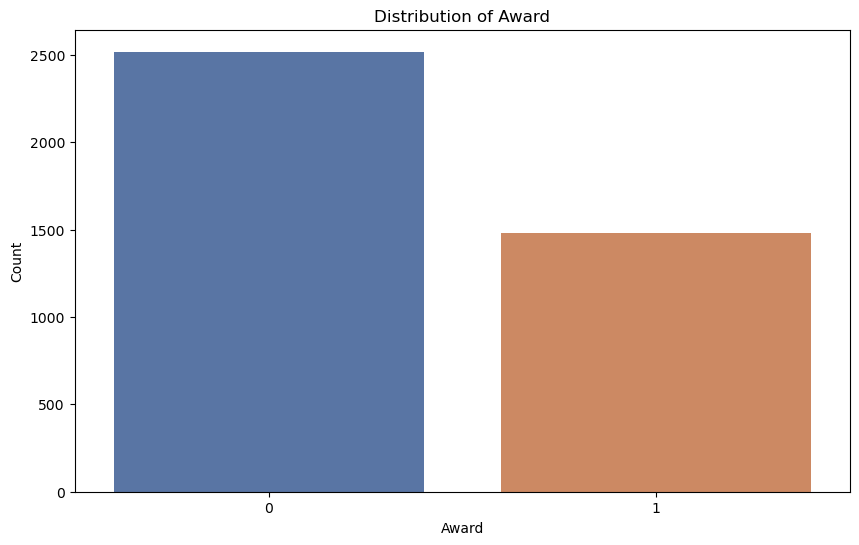

In [109]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Award', data=df, palette='deep')
plt.title('Distribution of Award')
plt.xlabel('Award')
plt.ylabel('Count')
plt.show()


## Boxplot to show the relationship between 'Award' and 'Balance'

C:\Users\gurwi\AppData\Local\Temp\ipykernel_11216\582879014.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Award', y='Balance', data=df, palette='Set2')


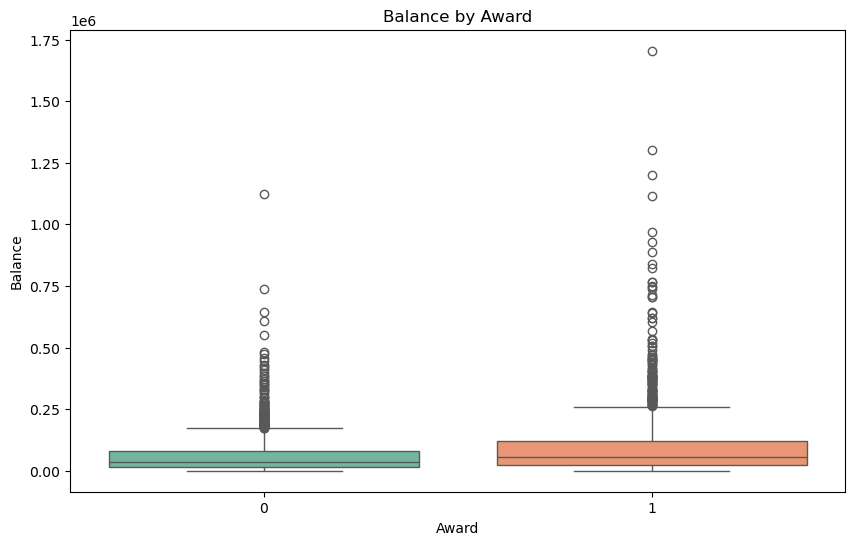

In [111]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Award', y='Balance', data=df, palette='Set2')
plt.title('Balance by Award')
plt.show()


## Plot feature importance

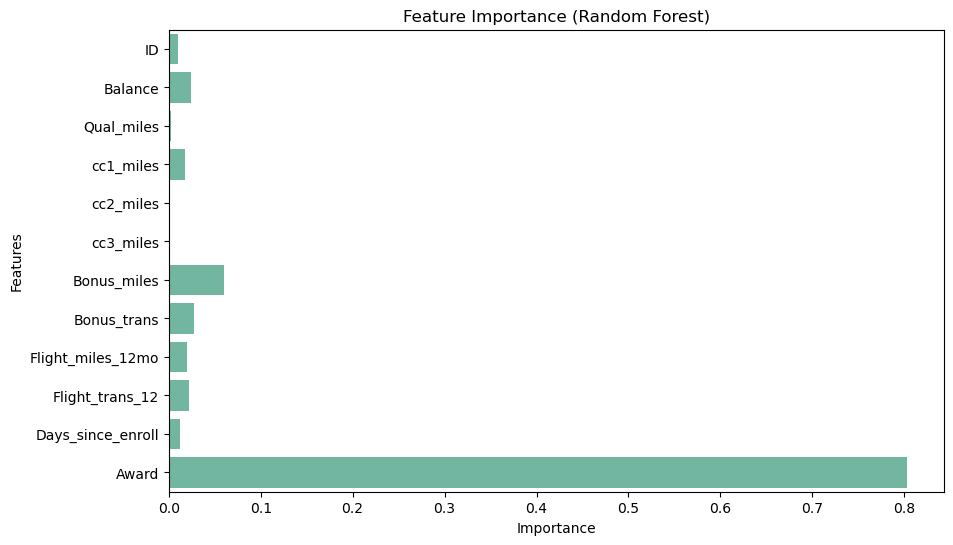

In [113]:
from sklearn.ensemble import RandomForestClassifier

# Assuming Award is a target variable
X = df[numerical_cols]
y = df['Award']

# Fit a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)


plt.figure(figsize=(10, 6))
sns.barplot(x=rf.feature_importances_, y=numerical_cols)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


## FacetGrid to visualize the distribution of numerical features for different Awards

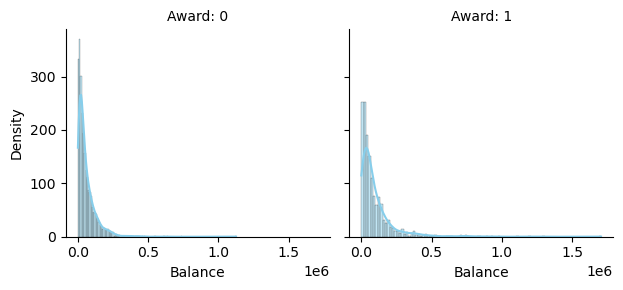

In [115]:

g = sns.FacetGrid(df, col="Award", col_wrap=4, height=3)
g.map(sns.histplot, 'Balance', kde=True, color="skyblue")
g.set_axis_labels("Balance", "Density")
g.set_titles("Award: {col_name}")
plt.show()


In [116]:
# Dropping non-numerical columns (ID and Award)
df_scaled = df.drop(columns=['ID', 'Award'])

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled)

# Convert to DataFrame after scaling
df_scaled = pd.DataFrame(df_scaled, columns=df.drop(columns=['ID', 'Award']).columns)

df

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [117]:
# Min-Max Scaling
scaler = MinMaxScaler()
df_scaled_minmax = scaler.fit_transform(df.drop(columns=['ID', 'Award']))

# Models

## KMeans

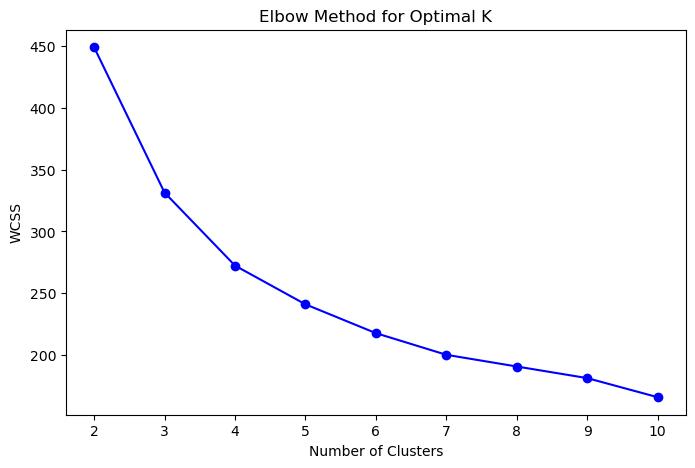

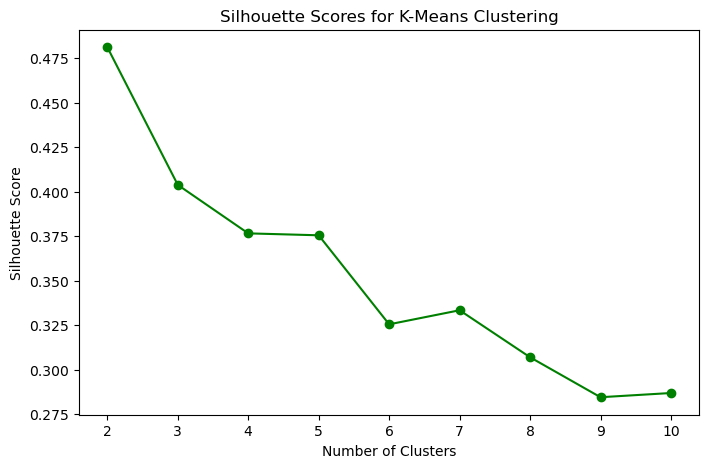

In [120]:
# Trying KMeans with different cluster numbers and random initialization
wcss = []
sil_scores = []

for k in range(2, 11):  # Start from 2 clusters as silhouette requires more than 1 cluster
    kmeans = KMeans(n_clusters=k, init='random', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled_minmax)
    wcss.append(kmeans.inertia_)
    if k > 1:
        sil_scores.append(silhouette_score(df_scaled_minmax, kmeans.labels_))

# Elbow Method Plot
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Scores Plot
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil_scores, marker='o', linestyle='-', color='green')
plt.title('Silhouette Scores for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## DBSCAN

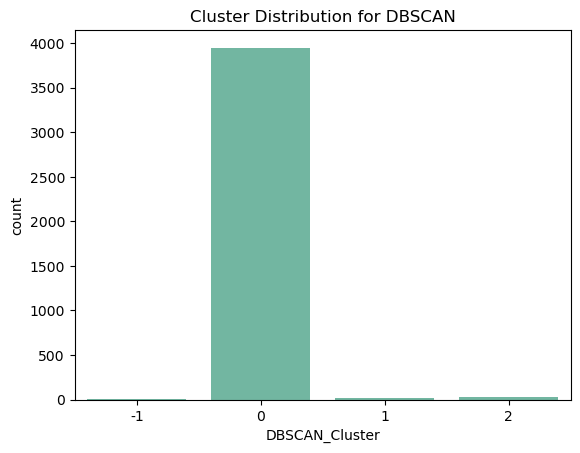

Silhouette Score for DBSCAN: 0.22528205271130916


In [122]:
# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can tune these parameters
y_dbscan = dbscan.fit_predict(df_scaled_minmax)

# Adding the cluster labels to the dataframe
df['DBSCAN_Cluster'] = y_dbscan

# Visualizing the cluster distribution
sns.countplot(x='DBSCAN_Cluster', data=df)
plt.title('Cluster Distribution for DBSCAN')
plt.show()

# Silhouette Score for DBSCAN
dbscan_silhouette = silhouette_score(df_scaled_minmax, y_dbscan)
print(f'Silhouette Score for DBSCAN: {dbscan_silhouette}')

## Gaussian Mixture Model (GMM)

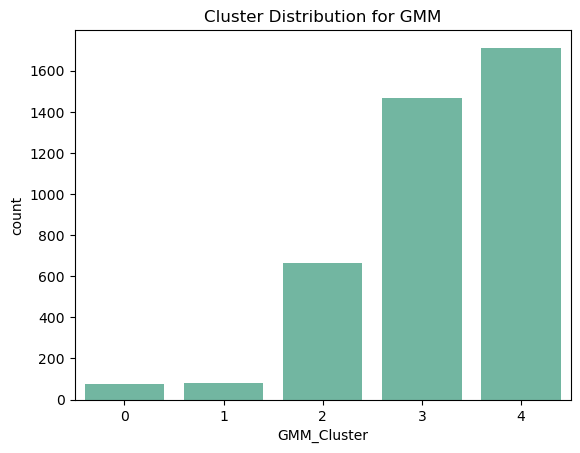

Silhouette Score for GMM: 0.209896056183862


In [124]:
# Applying Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=5, random_state=42)  # Set n_components to the number of clusters you want
gmm_labels = gmm.fit_predict(df_scaled_minmax)

# Adding the cluster labels to the dataframe
df['GMM_Cluster'] = gmm_labels

# Visualizing the cluster distribution
sns.countplot(x='GMM_Cluster', data=df)
plt.title('Cluster Distribution for GMM')
plt.show()

# Silhouette Score for GMM
gmm_silhouette = silhouette_score(df_scaled_minmax, gmm_labels)
print(f'Silhouette Score for GMM: {gmm_silhouette}')

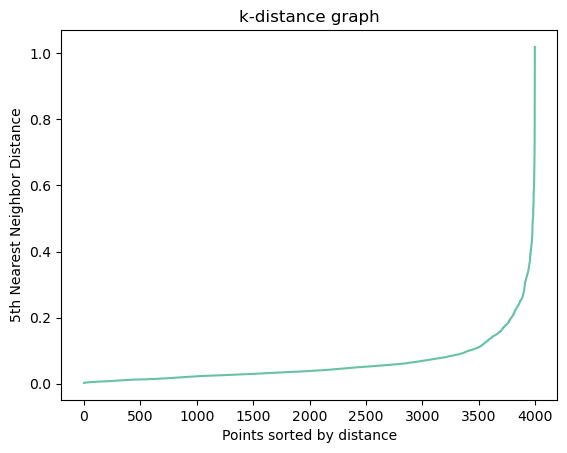

In [128]:
# Set min_samples to the desired value
min_samples = 5

# Fit NearestNeighbors to the scaled data
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_scaled_minmax)
distances, indices = neighbors_fit.kneighbors(df_scaled_minmax)

# Sort the distances to get the k-distance plot
distances = np.sort(distances[:, min_samples-1], axis=0)

# Plot the k-distance graph
plt.plot(distances)
plt.title('k-distance graph')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{min_samples}th Nearest Neighbor Distance')
plt.show()

In [129]:
# Try different eps values and min_samples
best_score = -1
best_eps = None
best_min_samples = None

for eps in np.linspace(0.1, 2, 20):  # Range of eps values to try
    for min_samples in range(3, 10):  # Range of min_samples values to try
        # Apply DBSCAN with the current eps and min_samples
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        y_dbscan = dbscan.fit_predict(df_scaled_minmax)
        
        # Only compute silhouette score for non-noise clusters (label > -1)
        if len(set(y_dbscan)) > 1:  # Ensure we have more than one cluster
            silhouette_avg = silhouette_score(df_scaled_minmax, y_dbscan)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples

print(f'Best Silhouette Score: {best_score}')
print(f'Best eps: {best_eps}, Best min_samples: {best_min_samples}')

Best Silhouette Score: 0.6626048712239866
Best eps: 0.7, Best min_samples: 3
